In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = df.iloc[:,3:].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state =42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

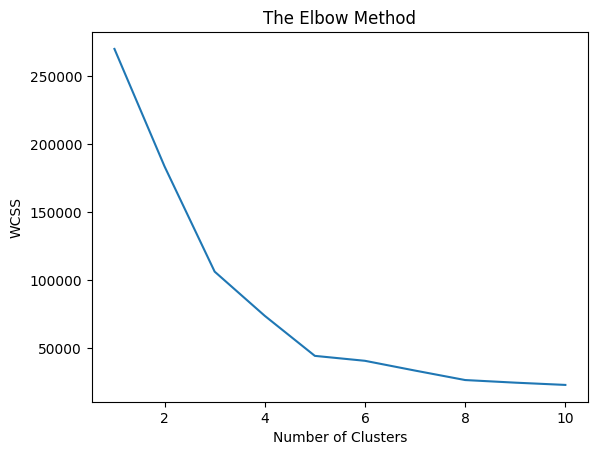

In [6]:
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
silh = []
for k in range(2,11):
    km = KMeans(n_clusters = k)
    labels = km.fit_predict(X)
    score = silhouette_score(X,labels)
    silh.append(score)

In [9]:
silh

[np.float64(0.2968969162503008),
 np.float64(0.46761358158775435),
 np.float64(0.4931963109249047),
 np.float64(0.553931997444648),
 np.float64(0.5379675585622219),
 np.float64(0.4545316868428992),
 np.float64(0.4231376026479909),
 np.float64(0.4428876106278084),
 np.float64(0.4481683397304883)]

Text(0, 0.5, 'silh')

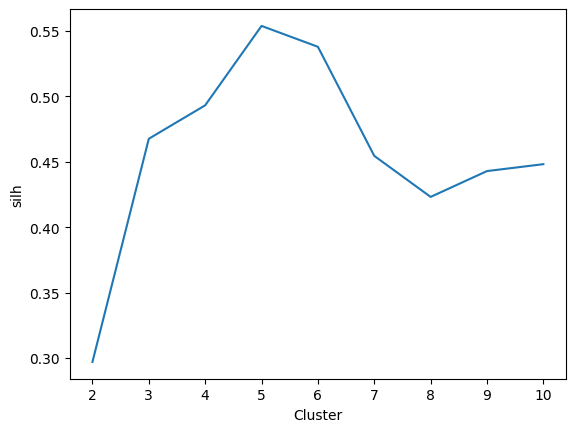

In [10]:
plt.plot(range(2,11),silh)
plt.xlabel('Cluster')
plt.ylabel('silh')

In [11]:
kmeans = KMeans(n_clusters = 5,random_state =42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [12]:
Ypred = kmeans.predict(X)

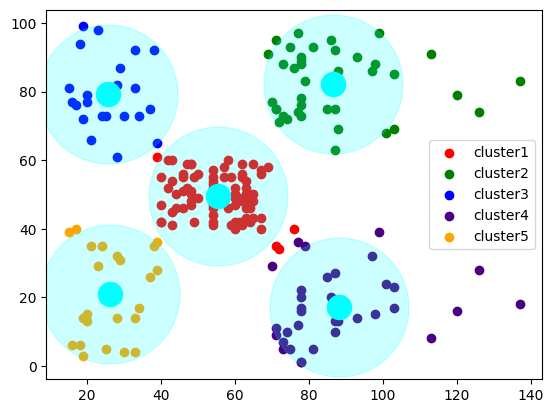

In [13]:
plt.scatter(X[Ypred==0,0],X[Ypred==0,1],color = 'red',label='cluster1')
plt.scatter(X[Ypred==1,0],X[Ypred==1,1],color = 'green',label='cluster2')
plt.scatter(X[Ypred==2,0],X[Ypred==2,1],color = 'blue',label='cluster3')
plt.scatter(X[Ypred==3,0],X[Ypred==3,1],color = 'indigo',label='cluster4')
plt.scatter(X[Ypred==4,0],X[Ypred==4,1],color = 'orange',label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'cyan',s=10000,alpha=0.2)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'cyan',s=300)
plt.legend()

In [14]:
from scipy.cluster import hierarchy as sch

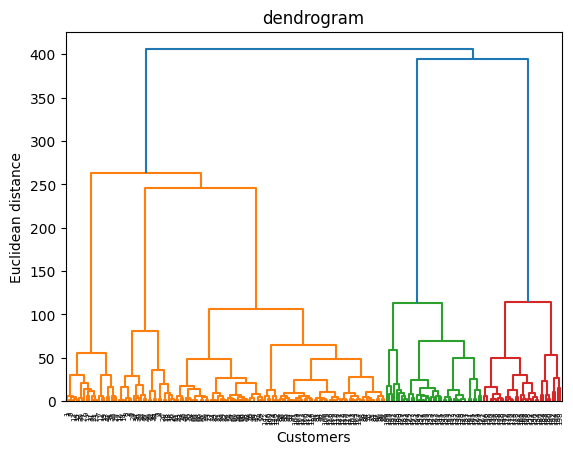

In [15]:
dendrogram = sch.dendrogram(sch.linkage(X , method = 'ward'))
plt.title('dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [16]:
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
Y_hc = hc.fit_predict(X)

In [17]:
Y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

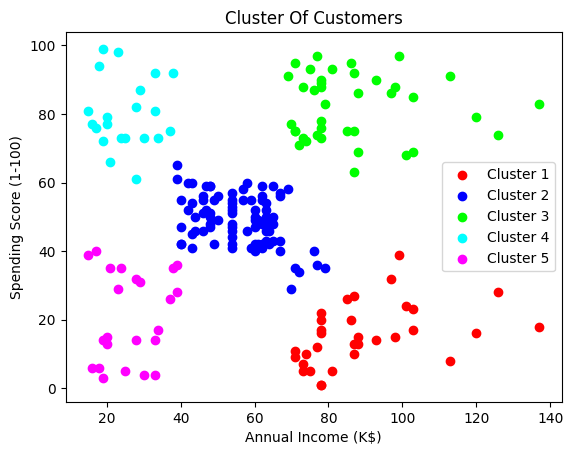

In [18]:
plt.scatter(X[Y_hc == 0,0],X[Y_hc == 0,1],color = 'red',label ='Cluster 1')
plt.scatter(X[Y_hc == 1,0],X[Y_hc == 1,1],color = 'blue',label ='Cluster 2')
plt.scatter(X[Y_hc == 2,0],X[Y_hc == 2,1],color = 'lime',label ='Cluster 3')
plt.scatter(X[Y_hc == 3,0],X[Y_hc == 3,1],color = 'cyan',label ='Cluster 4')
plt.scatter(X[Y_hc == 4,0],X[Y_hc == 4,1],color = 'magenta',label ='Cluster 5')
plt.title('Cluster Of Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

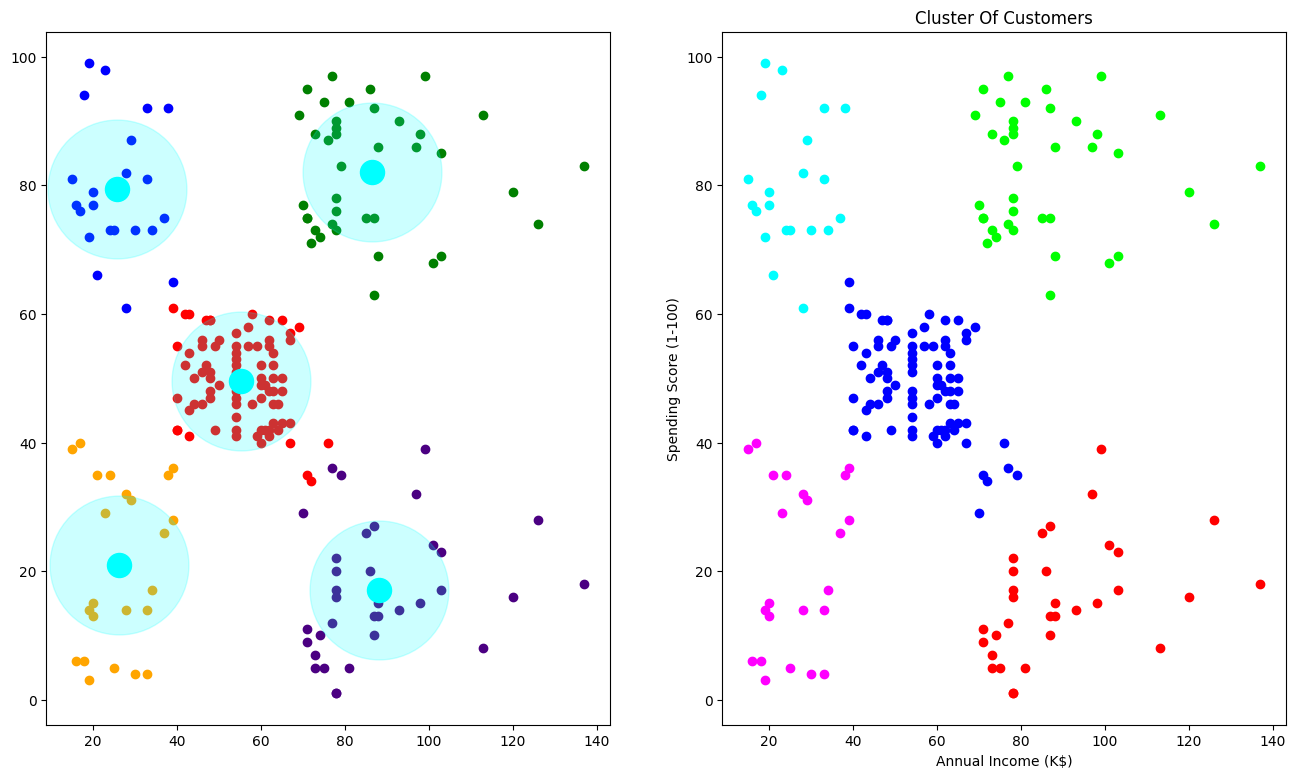

In [22]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.scatter(X[Ypred==0,0],X[Ypred==0,1],color = 'red',label='cluster1')
plt.scatter(X[Ypred==1,0],X[Ypred==1,1],color = 'green',label='cluster2')
plt.scatter(X[Ypred==2,0],X[Ypred==2,1],color = 'blue',label='cluster3')
plt.scatter(X[Ypred==3,0],X[Ypred==3,1],color = 'indigo',label='cluster4')
plt.scatter(X[Ypred==4,0],X[Ypred==4,1],color = 'orange',label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'cyan',s=10000,alpha=0.2)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'cyan',s=300)
plt.title('Kmeans Clustering')
plt.xlabel('Annual Income')
plt.subplot(1,2,2)
plt.scatter(X[Y_hc == 0,0],X[Y_hc == 0,1],color = 'red',label ='Cluster 1')
plt.scatter(X[Y_hc == 1,0],X[Y_hc == 1,1],color = 'blue',label ='Cluster 2')
plt.scatter(X[Y_hc == 2,0],X[Y_hc == 2,1],color = 'lime',label ='Cluster 3')
plt.scatter(X[Y_hc == 3,0],X[Y_hc == 3,1],color = 'cyan',label ='Cluster 4')
plt.scatter(X[Y_hc == 4,0],X[Y_hc == 4,1],color = 'magenta',label ='Cluster 5')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()